In [156]:
from summit.utils.dataset import DataSet
from summit.utils.thompson_sampling import ThompsonSampledModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [175]:
# Parameters
q = 3 # Batch size
n_points = 10
lower = -3
upper = 3

## Training

In [176]:
# Generate data
X = np.sort(np.random.uniform(lower,upper,(n_points,1)))
Y = np.mean(np.sin(X), axis=1) + np.random.randn(n_points)*0.05
Y = np.atleast_2d(Y).T
df = pd.DataFrame({"x": X[:,0], "y": Y[:,0]})
ds = DataSet.from_df(df)

In [177]:
# Training
samples = []
models = []
for i in range(q):
    model = ThompsonSampledModel("test_model")
    model.fit(
        ds[["x"]], ds[["y"]], n_retries=10, n_spectral_points=1500,
    )
    models.append(model)
    
    X_sample = np.linspace(lower,upper,400)
    df_sample = pd.DataFrame({'x':X_sample})
    ds_sample = DataSet.from_df(df_sample)
    sample_Y = model.predict(ds_sample)
    samples.append(sample_Y)

# # Evaluate spectral sampled functions
# sample_f = lambda x: np.atleast_2d(models[i].rff(x)).T
# rmse_train_spectral[i] = rmse(
#     sample_f(inputs.to_numpy().astype("float")),
#     outputs[[v.name]].to_numpy().astype("float"),
#     mean=self.transform.output_means[v.name],
#     std=self.transform.output_stds[v.name],
# )

SVD did not converge


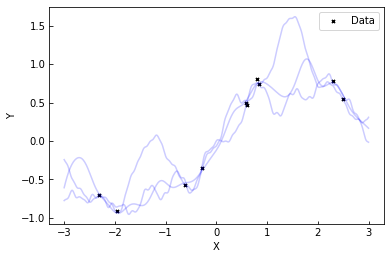

In [178]:
# X, Y, predict_Y, sample_Y = fit_and_sample()
fig, ax = plt.subplots(1)
# ax.scatter(X[:,0], predict_Y[:, 0], marker= 'o', label='GP Prediction')

for sample_Y in samples:
    ax.plot(X_sample, sample_Y, alpha=0.2, c='b')
ax.scatter(X[:,0], Y[:, 0], marker='x', s=10, c="k", label='Data')
ax.legend()
ax.tick_params(direction='in')
ax.set_xlabel('X')
_ = ax.set_ylabel('Y')

## Scipy optimization

In [211]:
def f_opt(X, models):
    return -1.0*np.sum([model.rff(xs) for xs, model in zip(X, models)])

In [212]:
optimal_vals = optimize.fmin(f_opt, np.linspace(-3,3,q), args=(models,))

Optimization terminated successfully.
         Current function value: -1.414191
         Iterations: 99
         Function evaluations: 177


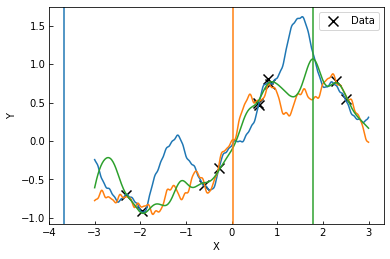

In [213]:
fig, ax = plt.subplots(1)
# Samples of GP
colors = plt.cm.tab10(np.linspace(0,0.2,q))
for i, sample_Y in enumerate(samples):
    ax.plot(X_sample, sample_Y, alpha=1, c=colors[i])

# Actual data
ax.scatter(X[:,0], Y[:, 0], marker='x', s=100, c="k", label='Data')

for i in range(q):
    ax.axvline(optimal_vals[i], c=colors[i])
ax.legend()
ax.tick_params(direction='in')
ax.set_xlabel('X')
_ = ax.set_ylabel('Y')
fig.savefig("simplex_optimization.png", dpi=300, bbox_inches="tight")

In [228]:
optimal_vals = optimize.brute(
    f_opt,
    ranges=[[lower, upper]]*q,
    args=(models,),
    Ns=10,
)

In [229]:
optimal_vals

array([1.5492268 , 2.2199792 , 1.78122943])

In [226]:
np.array([0,1,2]*3).flatten()

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

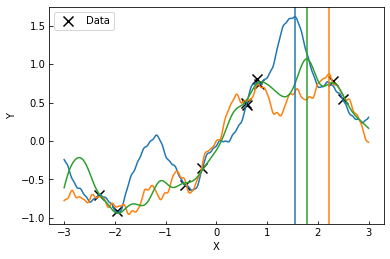

In [222]:
fig, ax = plt.subplots(1)
# Samples of GP
colors = plt.cm.tab10(np.linspace(0,0.2,q))
for i, sample_Y in enumerate(samples):
    ax.plot(X_sample, sample_Y, alpha=1, c=colors[i])

# Actual data
ax.scatter(X[:,0], Y[:, 0], marker='x', s=100, c="k", label='Data')

for i in range(q):
    ax.axvline(optimal_vals[i], c=colors[i])
ax.legend()
ax.tick_params(direction='in')
ax.set_xlabel('X')
_ = ax.set_ylabel('Y')
fig.savefig("brute_optimization.png", dpi=300, bbox_inches="tight")